In [36]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

c:\Users\Jaum Netu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


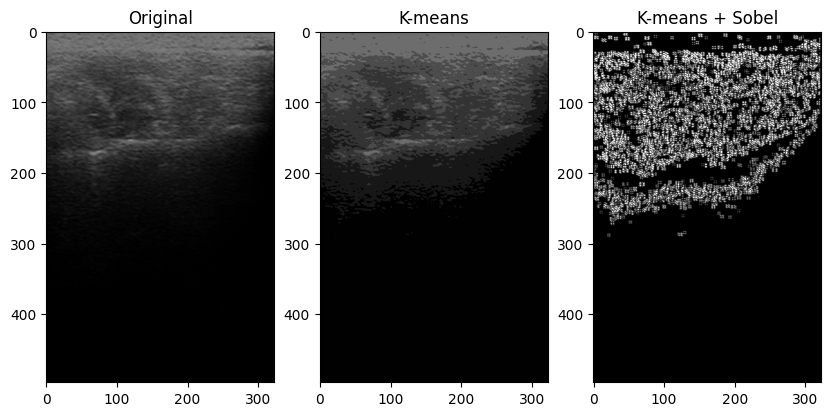

In [37]:
"""I. Aplicar K-means e Detector de Borda"""

# Função para aplicar o detector de bordas (Sobel)
def edge_detection(image):
    edges = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)
    edges = cv2.convertScaleAbs(edges)
    return edges

# Carregar a imagem
image_path = 'ultrassound/cropped/614410017.bmp'
image = cv2.imread(image_path)

# Transformar a imagem em uma matriz 2D de pixels
pixels = image.reshape((-1, 3))

# Número de clusters (K) para o algoritmo K-means
k = 5

# Aplicar o algoritmo K-means
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixels)

# Obter os centróides dos clusters
centers = np.uint8(kmeans.cluster_centers_)

# Atribuir a cada pixel a cor do centróide do cluster ao qual pertence
segmented_image = centers[kmeans.labels_].reshape(image.shape)

# Aplicar detector de bordas à imagem segmentada
edges_kmeans = edge_detection(segmented_image)

# Mostrar as imagens originais, segmentadas (K-means) e com detecção de bordas (K-means)
plt.figure(figsize=(10, 5))  # Modifique os valores conforme necessário
plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(132), plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)), plt.title('K-means')
plt.subplot(133), plt.imshow(edges_kmeans, cmap='gray'), plt.title('K-means + Sobel')
plt.show()


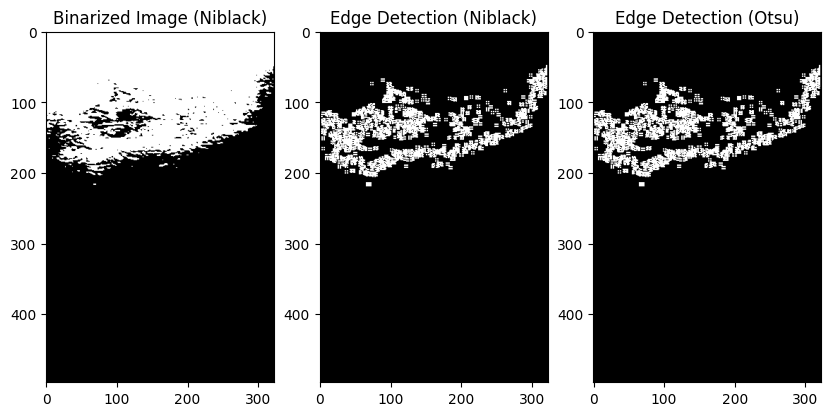

In [38]:
"""II. Implementar duas segmentações utilizando os algoritmos de binarização local e global:"""

# Binarização local (Niblack)
def local_binarization(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binarized_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binarized_image

# Binarização global (Otsu)
def global_binarization(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binarized_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binarized_image

# Aplicar binarização local (Niblack)
binarized_local = local_binarization(image)

# Aplicar binarização global (Otsu)
binarized_global = global_binarization(image)

# Aplicar detecção de bordas por gradiente nas imagens binarizadas
edges_local = edge_detection(binarized_local)
edges_global = edge_detection(binarized_global)

# Mostrar as imagens binarizadas, bem como as detecções de bordas para ambas
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(cv2.cvtColor(binarized_local, cv2.COLOR_BGR2RGB)), plt.title('Binarized Image (Niblack)')
plt.subplot(132), plt.imshow(cv2.cvtColor(edges_local, cv2.COLOR_BGR2RGB)), plt.title('Edge Detection (Niblack)')
plt.subplot(133), plt.imshow(binarized_global, cmap='gray'), plt.title('Binarized Image (Otsu)')
plt.subplot(133), plt.imshow(edges_global, cmap='gray'), plt.title('Edge Detection (Otsu)')
plt.show()


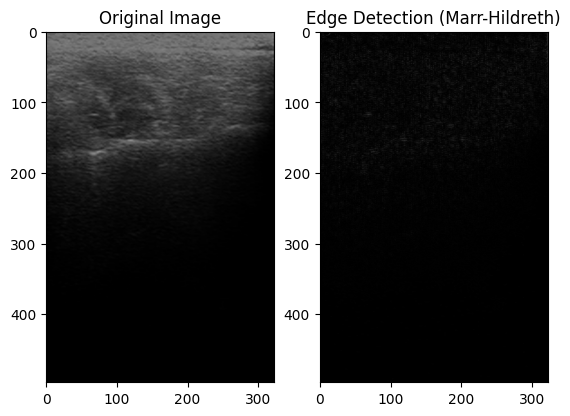

In [39]:
"""III. Realizar a detecção de bordas utilizando o método de Marr-Hildreth:"""

# Função para detecção de bordas por Marr-Hildreth
def marr_hildreth_edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Laplacian(gray, cv2.CV_64F)
    edges = cv2.convertScaleAbs(edges)
    return edges

# Aplicar detecção de bordas por Marr-Hildreth
edges_marr_hildreth = marr_hildreth_edge_detection(image)

# Mostrar a imagem original e a detecção de bordas por Marr-Hildreth
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(132), plt.imshow(cv2.cvtColor(edges_marr_hildreth, cv2.COLOR_BGR2RGB)), plt.title('Edge Detection (Marr-Hildreth)')
plt.show()


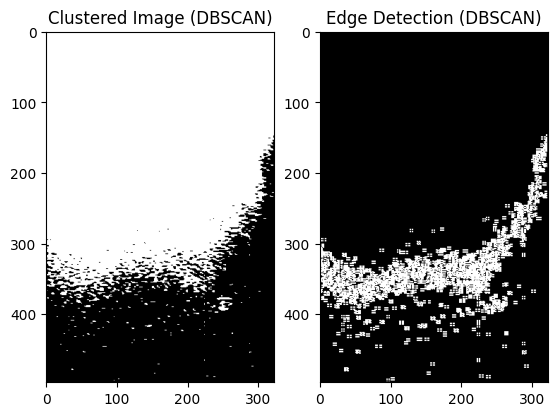

In [40]:
"""IV. Aplicar outro algoritmo de agrupamento e utilizar um detector de borda:"""

from sklearn.cluster import DBSCAN

# Função para aplicar o algoritmo DBSCAN
def dbscan_clustering(image):
    # Converte a imagem para a escala de cinza
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplica o algoritmo DBSCAN aos pixels da imagem
    pixels = np.column_stack(np.where(gray > 0))
    dbscan = DBSCAN(eps=5, min_samples=10)
    labels = dbscan.fit_predict(pixels)

    # Cria uma máscara para os pixels pertencentes ao mesmo cluster
    mask = np.zeros_like(gray, dtype=np.uint8)
    for label in np.unique(labels):
        cluster_mask = (labels == label)
        mask[pixels[cluster_mask][:, 0], pixels[cluster_mask][:, 1]] = 255

    return mask

# Aplicar o algoritmo DBSCAN
clustered_dbscan = dbscan_clustering(image)

# Aplicar detector de bordas à imagem agrupada
edges_dbscan = edge_detection(clustered_dbscan)

# Mostrar a imagem agrupada (DBSCAN) e a detecção de bordas
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(cv2.cvtColor(clustered_dbscan, cv2.COLOR_BGR2RGB)), plt.title('Clustered Image (DBSCAN)')
plt.subplot(132), plt.imshow(cv2.cvtColor(edges_dbscan, cv2.COLOR_BGR2RGB)), plt.title('Edge Detection (DBSCAN)')
plt.show()

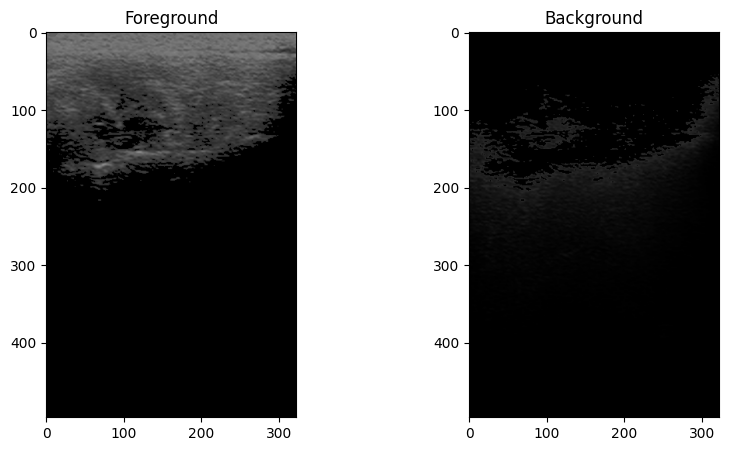

In [41]:
"""
Este código define uma função auto_foreground_background que recebe uma imagem como entrada, 
converte a imagem para escala de cinza, aplica a binarização de Otsu para obter uma imagem binária, 
e então usa essa imagem binária para separar o foreground e o background da imagem original. 
A função retorna o foreground e o background como duas imagens separadas.
"""

def auto_foreground_background(image):
    # Converter a imagem para escala de cinza
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Aplicar a binarização de Otsu
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # O foreground será onde os pixels são 255 (branco)
    foreground = cv2.bitwise_and(image, image, mask=binary)
    
    # O background será onde os pixels são 0 (preto)
    background = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(binary))
    
    return foreground, background

# Testar a função
foreground, background = auto_foreground_background(image)

# Mostrar o foreground e o background
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)), plt.title('Foreground')
plt.subplot(122), plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB)), plt.title('Background')
plt.show()